In [2]:
import ROOT
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import tqdm
ROOT.ROOT.EnableImplicitMT()

if "/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.so" not in ROOT.gSystem.GetLibraries():
    ROOT.gSystem.CompileMacro("/home/submit/pdmonte/CMSSW_10_6_27/src/Hrare2023/analysis/func_marti.cc","k")

Welcome to JupyROOT 6.28/00


In [83]:
date = "MAY31"

chainSGN = ROOT.TChain("events")
chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1040_GFcat_Phi3Cat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1037_GFcat_OmegaCat_2018.root".format(date))
#chainSGN.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc1039_GFcat_D0StarCat_2018.root".format(date))

date = "MAY30"
chainBKG = ROOT.TChain("events")
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_Phi3Cat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_Phi3Cat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_Phi3Cat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_Phi3Cat_2018.root".format(date))
chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_Phi3Cat_2018.root".format(date))

#chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc10_GFcat_D0StarCat_2018.root".format(date))
#chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc11_GFcat_D0StarCat_2018.root".format(date))
#chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc12_GFcat_D0StarCat_2018.root".format(date))
#chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc13_GFcat_D0StarCat_2018.root".format(date))
#chainBKG.Add("/data/submit/pdmonte/outputs/{0}/2018/outname_mc14_GFcat_D0StarCat_2018.root".format(date))

df = ROOT.RDataFrame(chainSGN)
dg = ROOT.RDataFrame(chainBKG)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas


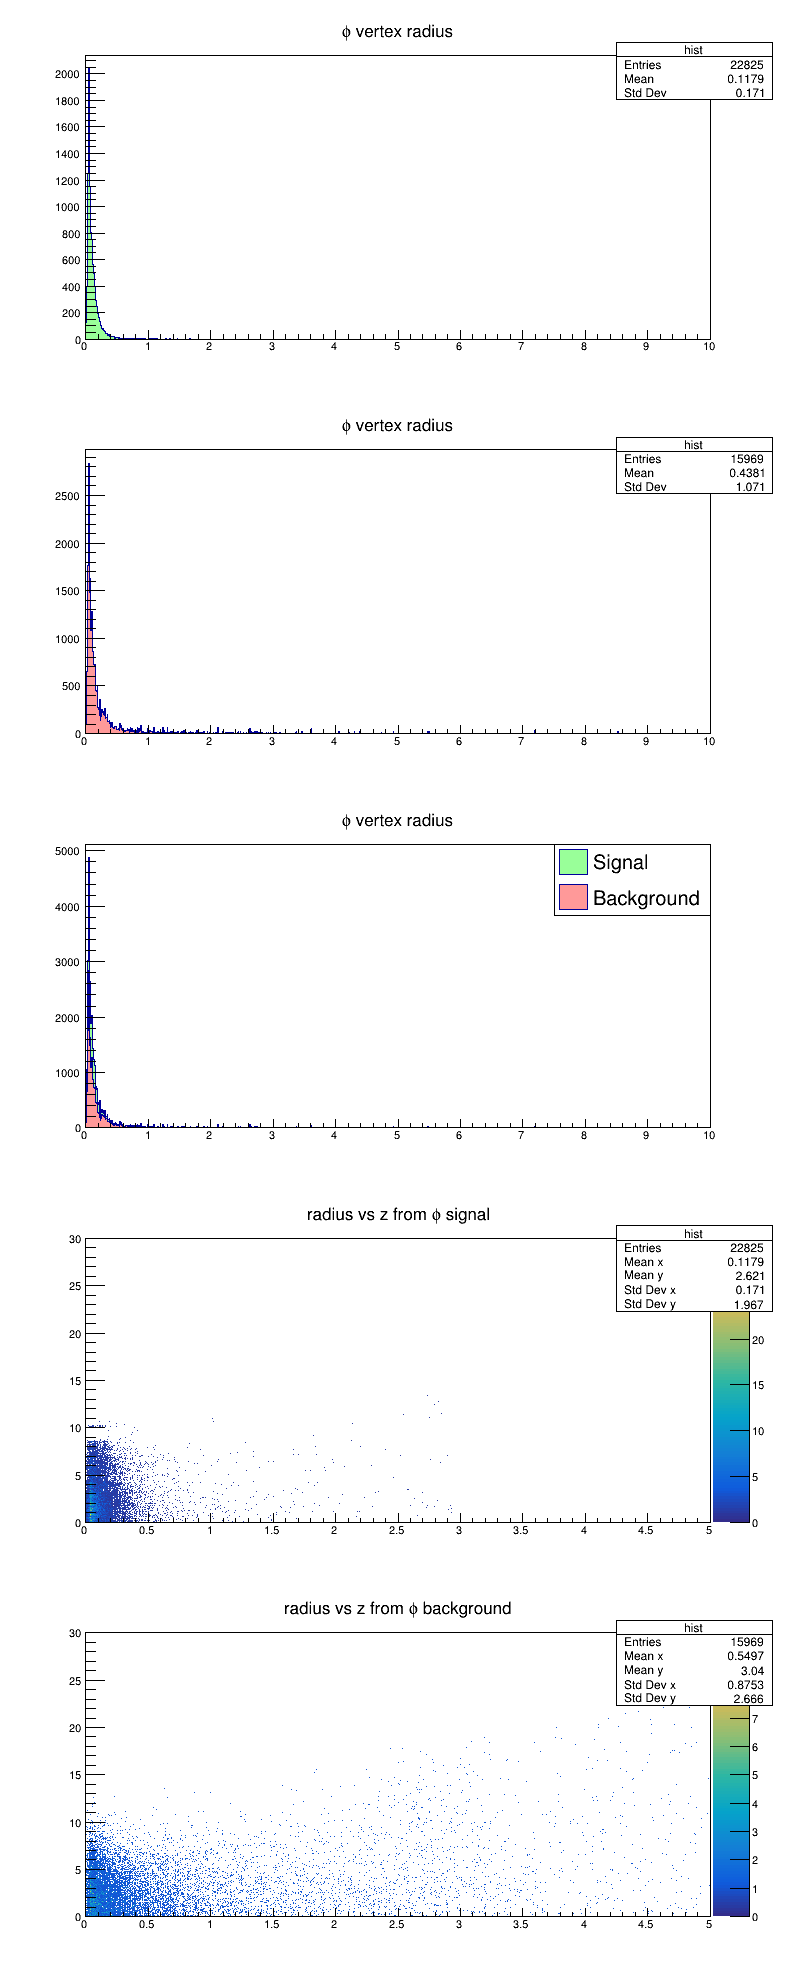

In [84]:
canvas = ROOT.TCanvas("canvas", "canvas", 800, 2000)

canvas.Divide(1, 5)

bins, xlow, xhigh = 1000, 0, 10

#Kinematic Mass
h1SGN=df.Define("scale", "w*lumiIntegrated")\
    .Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("absZ", "abs(goodMeson_bestVtx_Z)")\
    .Define("good", "radius")\
    .Histo1D(("hist", "#phi vertex radius", bins, xlow, xhigh),"good", "scale")
h1BKG=dg.Define("scale", "w*lumiIntegrated")\
    .Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("absZ", "abs(goodMeson_bestVtx_Z)")\
    .Define("good", "radius")\
    .Histo1D(("hist", "#phi vertex radius", bins, xlow, xhigh),"good", "scale")

hss = df.Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("absZ", "abs(goodMeson_bestVtx_Z)")\
    .Histo2D(("hist", "radius vs z from #phi signal", bins, 0, 5, bins, 0, 30),"radius", "absZ")

hbb = dg.Define("radius", "sqrt(goodMeson_bestVtx_X*goodMeson_bestVtx_X+goodMeson_bestVtx_Y*goodMeson_bestVtx_Y)")\
    .Define("absZ", "abs(goodMeson_bestVtx_Z)")\
    .Histo2D(("hist", "radius vs z from #phi background", bins, 0, 5, bins, 0, 30),"radius", "absZ")




h1SGN.SetFillColor(ROOT.kGreen-9)
h1BKG.SetFillColor(ROOT.kRed-9)

p=canvas.cd(1)
#p.SetLogy()
h1SGN.Draw("hist")
#h1SGN.Fit("gaus", "EQ", "", 0.4, 0.8)
#h1SGN.Draw("func same")

p=canvas.cd(2)
#p.SetLogy()
h1BKG.Draw("hist")
p=canvas.cd(3)
#p.SetLogy()
stack1 = ROOT.THStack("stack", "#phi vertex radius")
stack1.Add(h1BKG.GetValue())
stack1.Add(h1SGN.GetValue())
stack1.Draw("hist")
legend1 = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)
legend1.AddEntry(h1SGN.GetValue(), "Signal", "f")
legend1.AddEntry(h1BKG.GetValue(), "Background", "f")
legend1.Draw()

p=canvas.cd(4)
hss.SetContour(100)
hss.Draw("colz")

p=canvas.cd(5)
hbb.SetContour(100)
hbb.Draw("colz")

canvas.Draw()

15108.057396434853
30162.23381640349


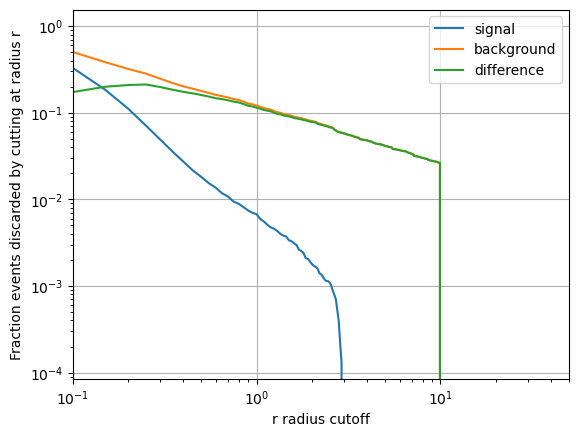

0.0 0.991894
0.05 0.615037
0.1 0.329843
0.15 0.18477
0.2 0.111686
0.25 0.071112
0.3 0.048854
0.35 0.035447
0.4 0.027253
0.45 0.021601
0.5 0.018183
0.55 0.015379
0.6 0.013627
0.65 0.011743
0.7 0.010779
0.75 0.00942
0.8 0.008895
0.85 0.008106
0.9 0.007449
0.95 0.00701
1.0 0.006748
1.05 0.005915
1.1 0.005521
1.15 0.005039
1.2 0.004732
1.25 0.004557
1.3 0.004294
1.35 0.003987
1.4 0.003812
1.45 0.003724
1.5 0.003374
1.55 0.003286
1.6 0.003111
1.65 0.002979
1.7 0.002629
1.75 0.002541
1.8 0.00241
1.85 0.002103
1.9 0.002059
1.95 0.001928
2.0 0.001796
2.05 0.001709
2.1 0.001665
2.15 0.001577
2.2 0.001402
2.25 0.001358
2.3 0.001271
2.35 0.001183
2.4 0.001139
2.45 0.001139
2.5 0.001095
2.55 0.001008
2.6 0.000876
2.65 0.000789
2.7 0.000701
2.75 0.000526
2.8 0.000394
2.85 0.000219
2.9 0.000131
2.95 0.0
3.0 0.0
3.05 0.0
3.1 0.0
3.15 0.0
3.2 0.0
3.25 0.0
3.3 0.0
3.35 0.0
3.4 0.0
3.45 0.0
3.5 0.0
3.55 0.0
3.6 0.0
3.65 0.0
3.7 0.0
3.75 0.0
3.8 0.0
3.85 0.0
3.9 0.0
3.95 0.0
4.0 0.0
4.05 0.0
4.1 0.0
4.15

In [85]:
def getPercentage(hist):
    radius = np.linspace(0, 50, 1000+1)
    areas = []
    totalArea = hist.Integral(0, hist.GetNbinsX()+1)
    print(totalArea)
    for r in radius:
        areas.append(hist.Integral(hist.FindBin(0), hist.FindBin(r)))
    areas = np.asarray(areas)
    return radius, 1 - areas/totalArea
    #print(hist.Integral(hist.FindBin(0), hist.FindBin(50)), hist.GetEntries())
    #print(hist.FindBin(0), hist.Integral(0, 96), hist.GetNbinsX()+1)

x, y1 = getPercentage(h1SGN)
plt.plot(x, y1, label="signal")
x, y2 = getPercentage(h1BKG)
plt.plot(x, y2, label="background")
plt.plot(x, y2-y1, label="difference")
plt.xscale("log")
plt.yscale("log")
#plt.yticks(np.arange(0, 1+0.001, 0.05))
#plt.ylim(0, 1)
plt.xlim(0.1, 50)

plt.xlabel("r radius cutoff")
plt.ylabel("Fraction events discarded by cutting at radius r")
plt.grid()
plt.legend()
plt.show()
for a, b in zip(x, y1):
    print(round(a, 4), round(b, 6))